<a href="https://colab.research.google.com/github/imshubhamkore/Email_Classifier_ML/blob/main/Email_spam_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro Of This Notebook
The aim of this study is to clacify spam email by using different machine learning algorithms. For this purpose, I will use,
* Multinomial Naive Bayes Classifier
* Support Vecrot Machine Classifier with Radial basis function kernel (RBF)
* k Nearest Neighbor Classifier(KNN)
* Decision Tree Classifier,
* Random Forest Classifier.
I will give a short description about those algorithms.

## About the Dataset:
 *  The used dataset is a CSV file.
 *  It contains 5573 individual emails.
 *  Each email has classified by Ham or Spam.

In [100]:
# Import Libraries
import numpy as np
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [101]:
#Load Data
df=pd.read_csv('email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [103]:
#categorized the dataframe
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [104]:
X=df['Message']
y=df['spam']

In [105]:
#Split train and test Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# Naive Bayes Algorithm
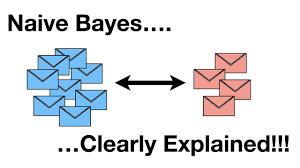
<br>
## <b>What is Naive Bayes algorithm?</b><br>
### It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
## <b> What is Naive Bayes Classifier?</b>
### Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

### Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.

<center>
<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836882/image_3_ijznzs.png">
</center>
<ul>
<li>P(h): the probability of hypothesis h being true (regardless of the data). This is known as the prior probability of h.</li>
<li>P(D): the probability of the data (regardless of the hypothesis). This is known as the prior probability.</li>
<li>P(h|D): the probability of hypothesis h given the data D. This is known as posterior probability.</li>
<li>P(D|h): the probability of data d given that the hypothesis h was true. This is known as posterior probability.</li>
</ul>

<br>
<br>

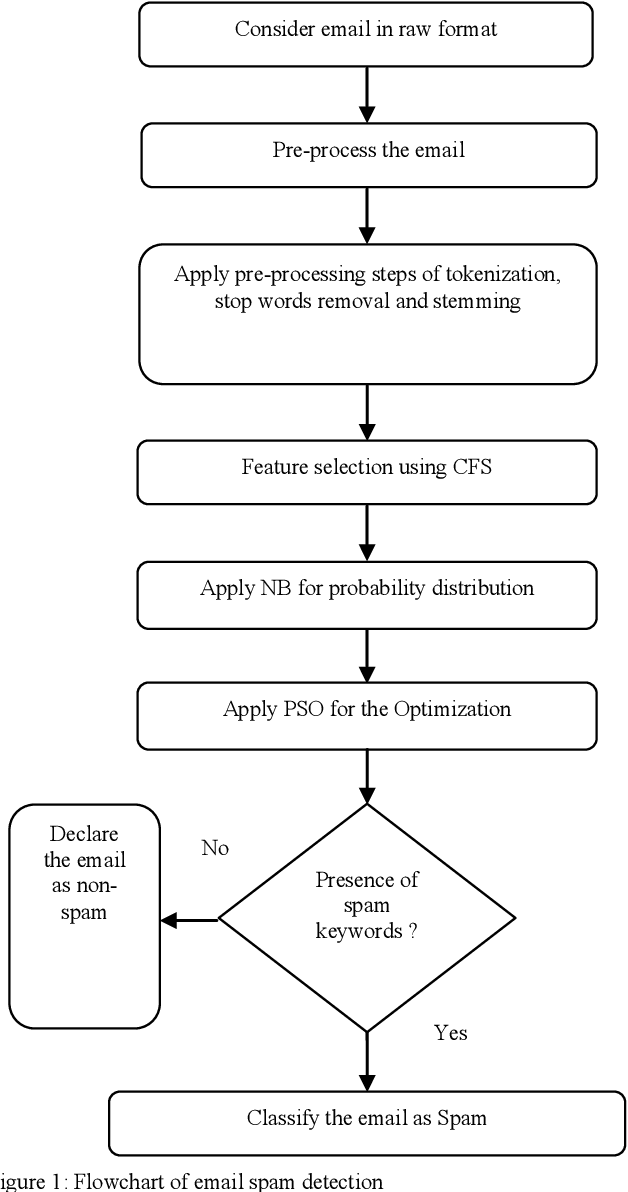





## Create Classifier for Naive Biased

In [106]:
#Defineing Naive Baised
clf_NaiveBaised= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nd', MultinomialNB())
])

In [107]:
clf_NaiveBaised.fit(X_train,y_train)
y_pred_NB=clf_NaiveBaised.predict(X_test)

<Axes: >

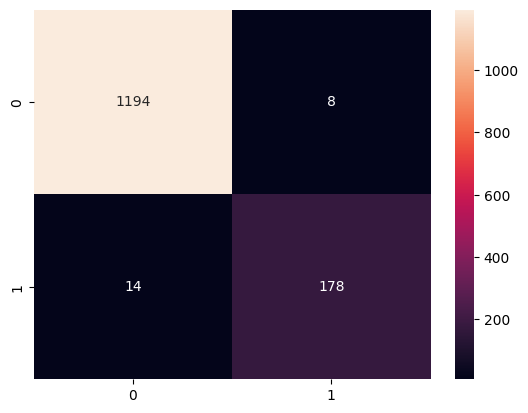

In [108]:
## Plot Confusion Matrix
cm=confusion_matrix(y_test,y_pred_NB)
sns.heatmap(cm,annot=True,fmt='d')

In [109]:
naive_acc=accuracy_score(y_test,y_pred_NB)
naive_acc

0.9842180774748924

# Support Vector Machine Classifier



### Support Vector Machines
Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

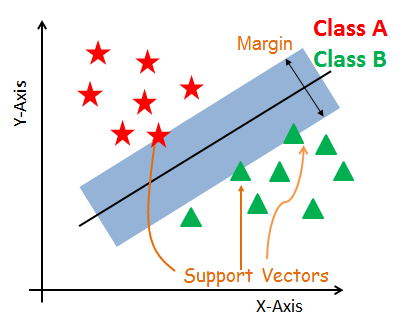

## Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

## Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

## Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.


## How does SVM work?
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

1. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.<br>
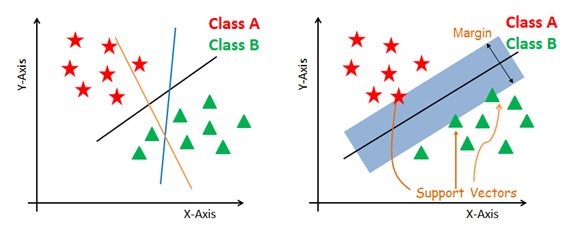

## SVM Kernels
The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

* <b>Linear Kernel</b>  A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
> k(x,xi)=sum(x*xi)

* <b>Radial Basis Function Kernel </b>The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.
> K(x,xi) = exp(-gamma * sum((x – xi^2))


## Generating Model

Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict()

> #Import svm model<br>
> from sklearn import svm<br>
>
> #Create a svm Classifier<br>
> clf = svm.SVC(kernel='linear') # Linear Kernel<br>
>
> #Train the model using the training sets<br>
> clf.fit(X_train, y_train)<br>
>
> #Predict the response for test dataset<br>
> y_pred = clf.predict(X_test)<br>

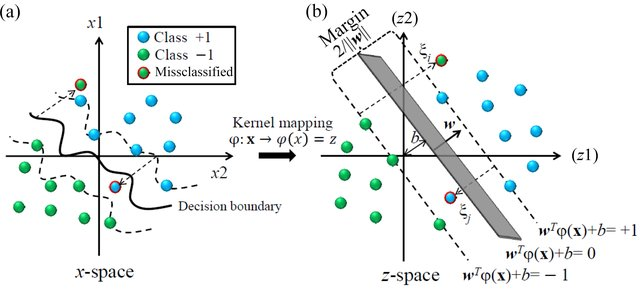


## Create Classifier for SVM

In [110]:
clf_svm=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('svc',SVC(kernel='rbf',C=1000,gamma=0.001))
])

In [111]:
clf_svm.fit(X_train,y_train)
y_pred_svm=clf_svm.predict(X_test)

<Axes: >

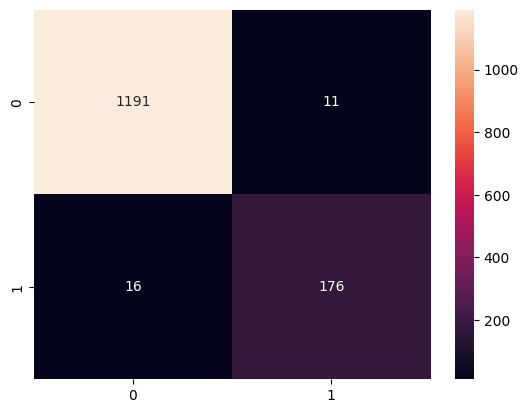

In [112]:
#Plot Confusion Matrix
cm_svm=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm_svm,annot=True,fmt='d')

In [113]:
svm_acc=accuracy_score(y_test,y_pred_svm)
svm_acc

0.9806312769010043

# k nearest neighbor classifier



<b>K-Nearest Neighbors</b>

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.


<b>How does the KNN algorithm work?</b>

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.<br>
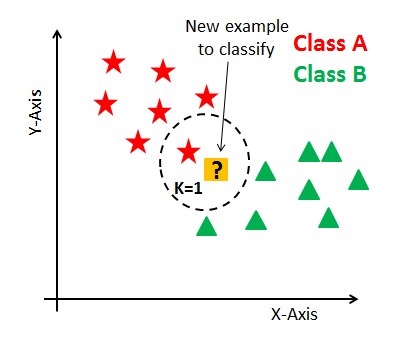
Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

1. Calculate distance
2. Find closest neighbors
3. Vote for labels <br>

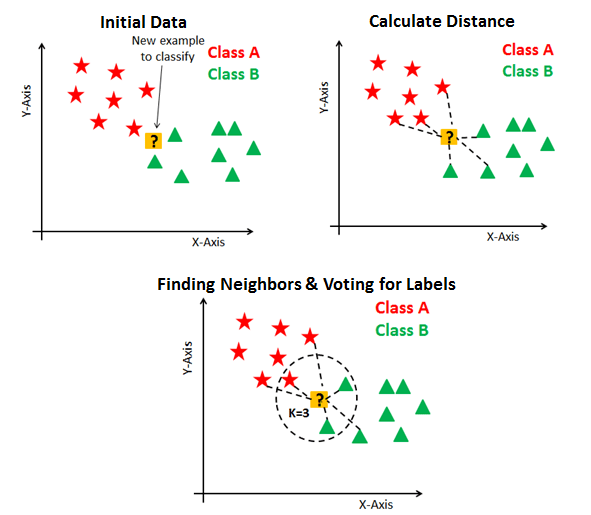



## Create Classifier for KNN

In [114]:
clf_knn= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [115]:
clf_knn.fit(X_train,y_train)
y_pred_knn=clf_knn.predict(X_test)

<Axes: >

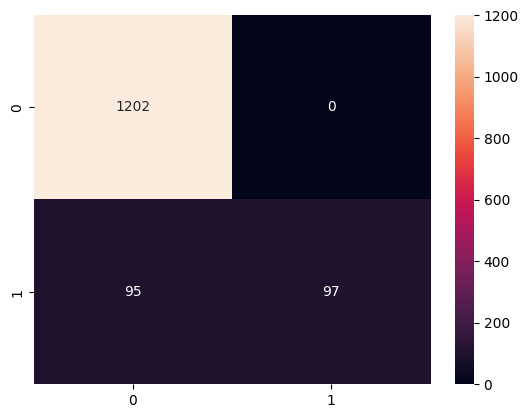

In [116]:
#plot Confusion Matrix
cm_knn=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm_knn,annot=True,fmt='d')

In [117]:
knn_acc=accuracy_score(y_test,y_pred_knn)
knn_acc

0.9318507890961263

# Decision Tree Classifier


<b>Decision Tree Algorithm</b>

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

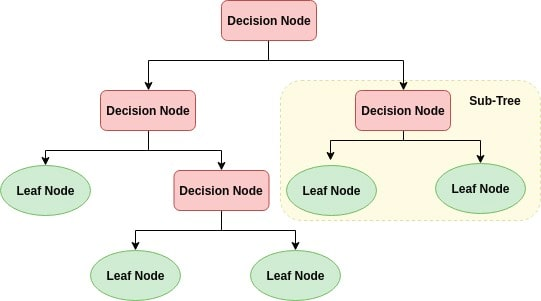

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.


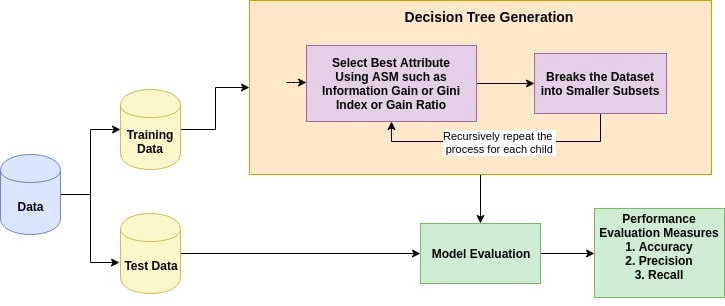

<b>Entropy</b>


A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.

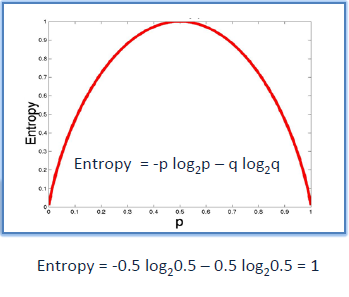



## Create Classifier for DT

In [118]:
clf_DecisionTree=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('dt',DecisionTreeClassifier())
])

In [119]:
clf_DecisionTree.fit(X_train,y_train)
y_pred_DT=clf_DecisionTree.predict(X_test)

<Axes: >

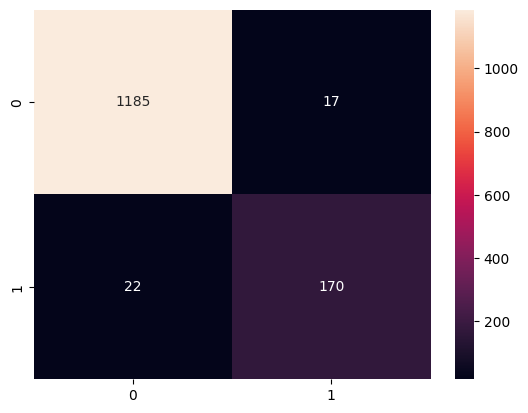

In [120]:
#Plot Confusion Matrix
cm_DT=confusion_matrix(y_test,y_pred_DT)
sns.heatmap(cm_DT,annot=True,fmt='d')

In [121]:
dt_acc=accuracy_score(y_test,y_pred_DT)
dt_acc

0.9720229555236729

# Random Forest Classifier


<b>What is a random forest?</b>

A random forest is a machine learning technique that’s used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.

A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.

The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

A random forest eradicates the limitations of a decision tree algorithm. It reduces the overfitting of datasets and increases precision.

## Features of a Random Forest Algorithm
* It’s more accurate than the decision tree algorithm.
* It provides an effective way of handling missing data.
* It can produce a reasonable prediction without hyper-parameter tuning.
* It solves the issue of overfitting in decision trees.
* In every random forest tree, a subset of features is selected randomly at the node’s splitting point.

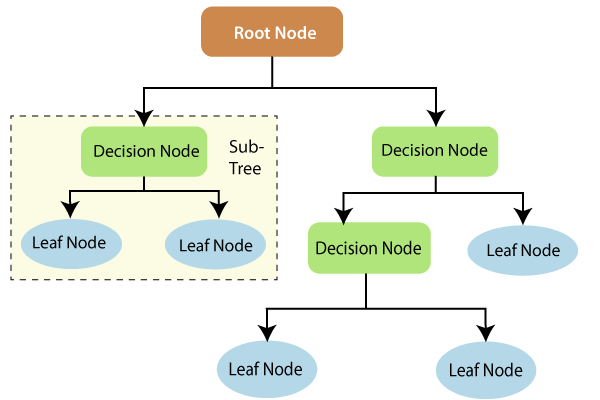

## Classification in random forests

Classification in random forests employs an ensemble methodology to attain the outcome. The training data is fed to train various decision trees. This dataset consists of observations and features that will be selected randomly during the splitting of nodes.

A rain forest system relies on various decision trees. Every decision tree consists of decision nodes, leaf nodes, and a root node. The leaf node of each tree is the final output produced by that specific decision tree. The selection of the final output follows the majority-voting system. In this case, the output chosen by the majority of the decision trees becomes the final output of the rain forest system. The diagram below shows a simple random forest classifier.

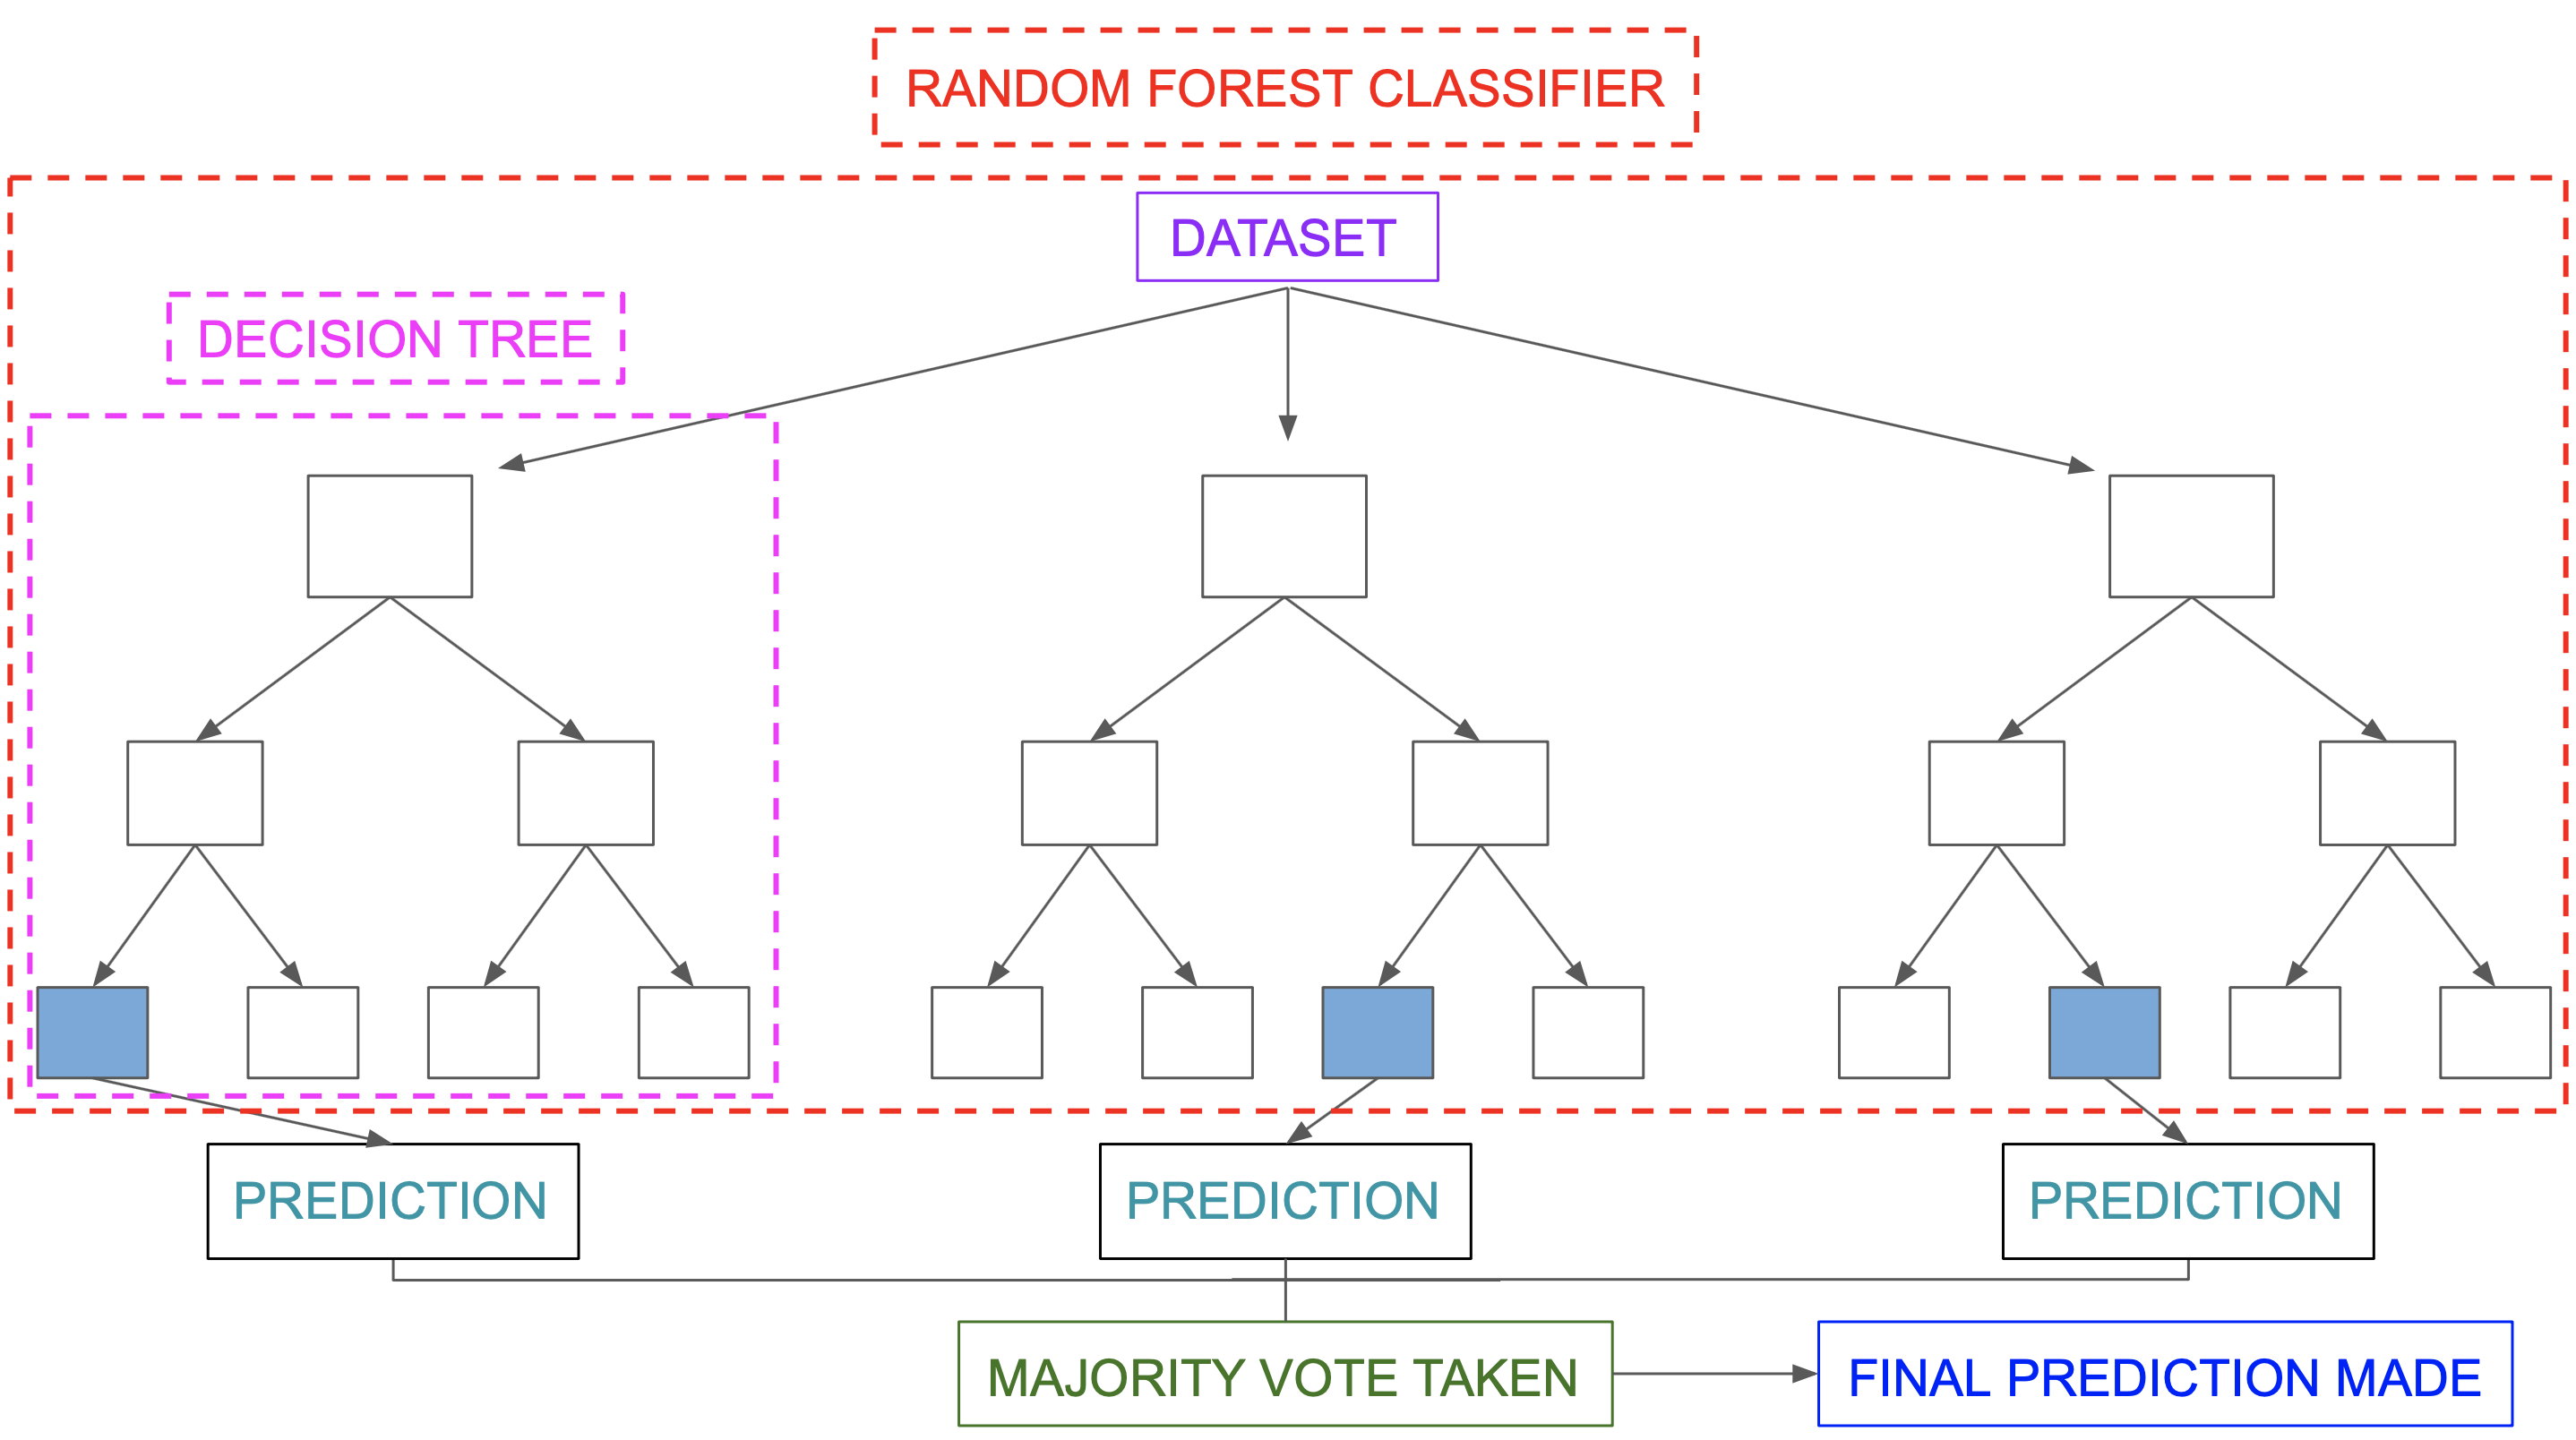


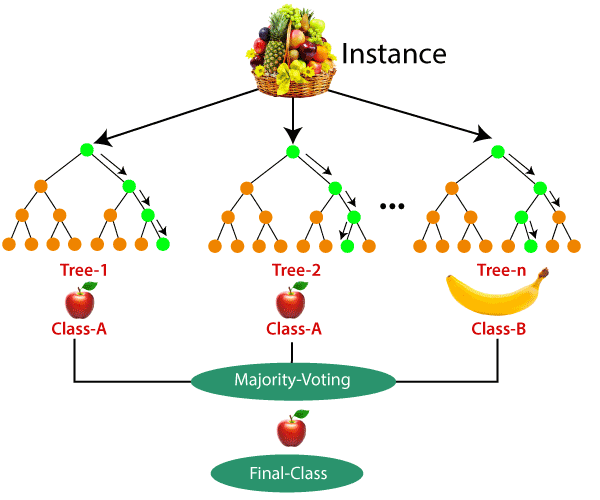


## Create Classifier for RF

In [122]:
clf_rf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('rf',RandomForestClassifier(n_estimators=100))
])

In [123]:
clf_rf.fit(X_train,y_train)
y_pred_rf=clf_rf.predict(X_test)

<Axes: >

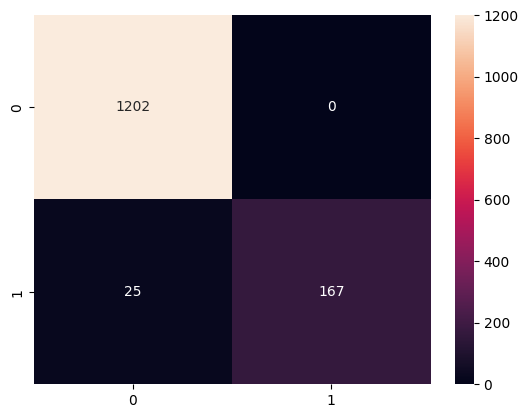

In [124]:
#plot Confusion Matrix
cm_rf=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_rf,annot=True,fmt='d')

In [125]:
rf_acc=accuracy_score(y_test,y_pred_rf)
rf_acc

0.9820659971305595

## Compareing Accurucy of those Algorithm

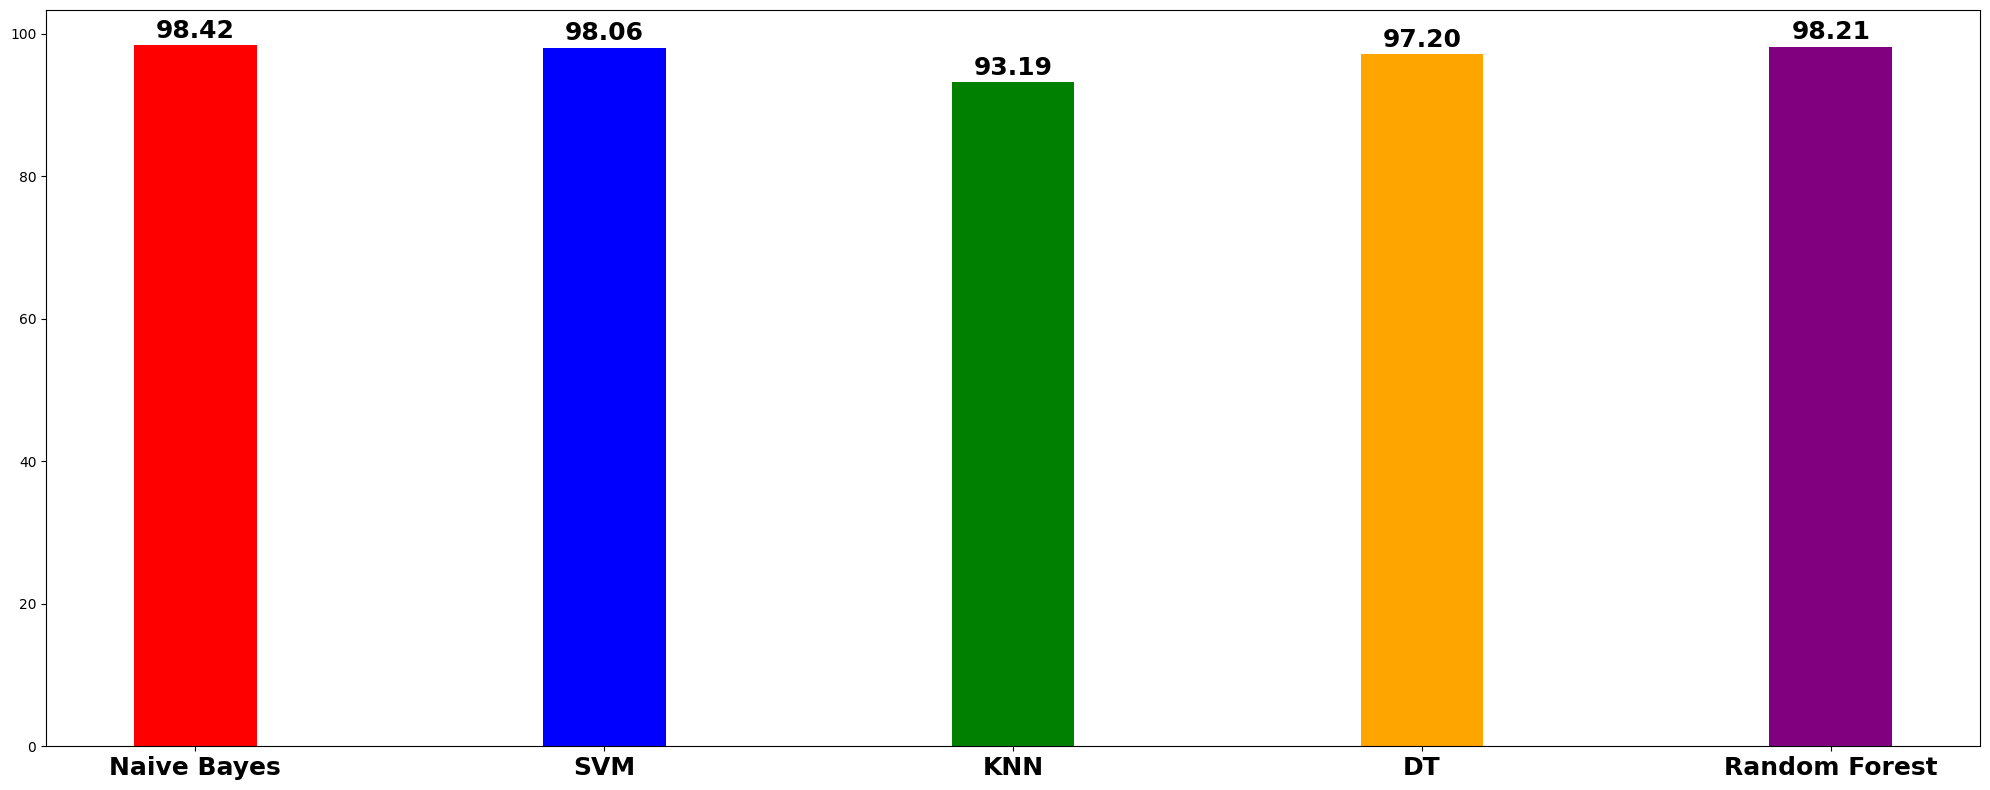

In [126]:
models = ['Naive Bayes', 'SVM', 'KNN', 'DT', 'Random Forest']
accuracies = np.array([naive_acc, svm_acc, knn_acc, dt_acc, rf_acc]) * 100
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(20, 8))
bars = plt.bar(models, accuracies, width=0.3, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.2f}",
        ha='center',
        fontsize=18,
        fontweight='bold'
    )

plt.xticks(fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()



## Let's Test our model with coustom email

In [127]:
#Function for testing custome email
def spam_dect(clf,txt):
    a=clf.predict([txt])
    if a==1:
        print("This is a Spam email")
    else:
        print("This is a Real email")

In [128]:
#Demo email
test_email_1="Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!" #Spam Email from my mail box
test_email_2="Hey Shubham, can we do an evening scrum call on Google meeting?"  #Real Email from my mail box

In [129]:
#Predict with Naive Bayes
spam_dect(clf_NaiveBaised,test_email_1)

This is a Spam email


In [130]:
#Predict with Naive Bayes
spam_dect(clf_NaiveBaised,test_email_2)

This is a Real email
